# Plot the coordinates of smet files in a certain directory

In [150]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd

# Get lat/lon

In [151]:
%%bash
cd /scratch/summit/erke2265/mass-balance/400_sites/smet/
ls -- *.smet | wc -l
basename -s .smet -- *.smet > /scratch/summit/erke2265/mass-balance/notebooks/input_smet_list.txt

400


In [152]:
sites = np.loadtxt("input_smet_list.txt", dtype=str)
lat_lon = np.zeros([len(sites), 2]); lat_lon[:] = np.nan

for j in range(0, len(sites)):
    lat_lon_str = sites[j].split("_")
    lat_lon[j, 0] = float(lat_lon_str[0])
    lat_lon[j, 1] = float(lat_lon_str[1])

# Make map

(400, 2)


/projects/erke2265/miniconda/envs/alpine3d/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


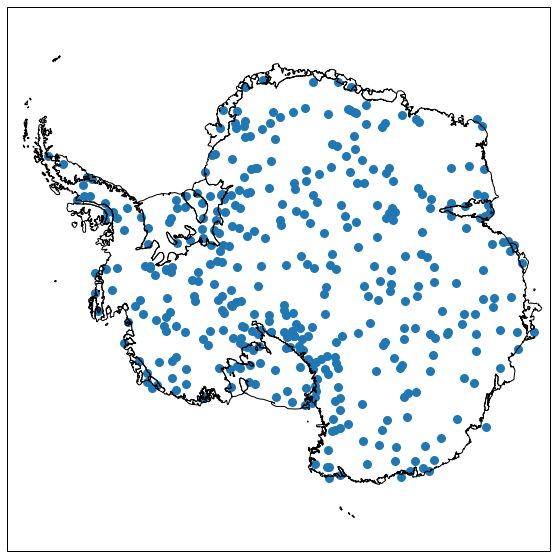

In [153]:
# Get coastlines
df = gpd.read_file("/pl/active/nasa_smb/Data/ADD_Coastline_low_res_polygon.shp")
crs_epsg = ccrs.SouthPolarStereo()
df_epsg = df.to_crs(epsg='3031')

# Generate figure 
fig, axs = plt.subplots(1, 1, subplot_kw={'projection': crs_epsg},
                        figsize=(10, 10))

# Plot sites
plt.scatter(lat_lon[:,1], lat_lon[:,0], linewidth=3, transform=ccrs.PlateCarree())
print(lat_lon.shape)

# Plot coastlines
axs.set_extent((-180, 180, -90, -65), ccrs.PlateCarree())
axs.add_geometries(df_epsg['geometry'], crs=crs_epsg,
                      facecolor='none', edgecolor='black')
